# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [154]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

In [143]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

NEWS_API_KEY = os.environ["NEWS_API_KEY"]

In [144]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(NEWS_API_KEY)

In [145]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(
            q='Bitcoin',            
            language="en",
            sort_by="relevancy",
            page=1
        )

In [146]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(
            q='Ethereum',            
            language="en",
            sort_by="relevancy",
            page=1
        )

In [147]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiment = {
    "Compound": [],
    "Positive": [],
    "Neutral": [],
    "Negative": [],
    "text": [],
}

bitcoin_articles = [article['description'] for article in bitcoin_news['articles']]

for article in bitcoin_articles:
    try:        
        sentiment = analyzer.polarity_scores(article)

        bitcoin_sentiment["Compound"].append(sentiment["compound"])
        bitcoin_sentiment["Positive"].append(sentiment["pos"])
        bitcoin_sentiment["Neutral"].append(sentiment["neu"])
        bitcoin_sentiment["Negative"].append(sentiment["neg"])
        bitcoin_sentiment["text"].append(article)
    except AttributeError:
        pass

bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_sentiment_df.head()

,Compound,Positive,Neutral,Negative,text
0,-0.4767,0.000,0.925,0.075,"Authorities in Tampa, Florida have arrested a ..."
1,0.5994,0.123,0.877,0.000,"Casa, a Colorado-based provider of bitcoin sec..."
2,-0.2500,0.000,0.895,0.105,Bitcoin payments and IP addresses led investig...
3,-0.0772,0.102,0.812,0.086,"Graham Ivan Clark, the 17-year-old “mastermind..."
4,0.0000,0.000,1.000,0.000,The story of a guy who wouldn't let a few quin...


In [148]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiment = {
    "Compound": [],
    "Positive": [],
    "Neutral": [],
    "Negative": [],
    "text": [],
}

ethereum_articles = [article['description'] for article in ethereum_news['articles']]      

for article in ethereum_articles:
    try:
        sentiment = analyzer.polarity_scores(article)

        ethereum_sentiment["Compound"].append(sentiment["compound"])
        ethereum_sentiment["Positive"].append(sentiment["pos"])
        ethereum_sentiment["Neutral"].append(sentiment["neu"])
        ethereum_sentiment["Negative"].append(sentiment["neg"])
        ethereum_sentiment["text"].append(article)
    except AttributeError:
        pass

ethereum_sentiment_df = pd.DataFrame(ethereum_sentiment)
ethereum_sentiment_df.head()

,Compound,Positive,Neutral,Negative,text
0,0.3612,0.059,0.941,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
1,0.5267,0.185,0.739,0.076,It sounds like a surefire bet. You lend money ...
2,0.0000,0.000,1.000,0.000,Brooklyn-based technology startup ConsenSys ha...
3,0.0258,0.062,0.878,0.059,<ol><li>Million-Dollar Bitcoin Whale Says Trad...
4,0.3400,0.058,0.942,0.000,<ul>\n<li>Michael Novogratz told Bloomberg the...


In [149]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_describe_df = bitcoin_sentiment_df.describe()
bitcoin_describe_df

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.00000,20.000000
mean,0.140010,0.074700,0.87365,0.051500
std,0.458388,0.059353,0.07667,0.065857
min,-0.680800,0.000000,0.69200,0.000000
25%,-0.232225,0.000000,0.84075,0.000000
50%,0.086250,0.074000,0.87700,0.000000
75%,0.564600,0.120000,0.92350,0.090750
max,0.750600,0.172000,1.00000,0.193000


In [150]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_describe_df = ethereum_sentiment_df.describe()
ethereum_describe_df

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.176695,0.106700,0.838250,0.055000
std,0.322508,0.126502,0.174707,0.093294
min,-0.493900,0.000000,0.458000,0.000000
25%,0.000000,0.000000,0.781750,0.000000
50%,0.162800,0.071000,0.899000,0.000000
75%,0.420600,0.150250,0.941250,0.068250
max,0.726900,0.504000,1.000000,0.317000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [151]:

# Which coin had the highest mean positive score?
if (ethereum_describe_df['Positive']['mean'] > bitcoin_describe_df['Positive']['mean']):
    print('ethereum')
else:
    print('bitcoin') 

ethereum


In [152]:
# Which coin had the highest compound score?
if (ethereum_describe_df['Compound']['max'] > bitcoin_describe_df['Compound']['max']):
    print('ethereum')
else:
    print('bitcoin')   

bitcoin


In [153]:
# Which coin had the highest positive score?
if (ethereum_describe_df['Positive']['max'] > bitcoin_describe_df['Positive']['max']):
    print('ethereum')
else:
    print('bitcoin') 

ethereum


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [177]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation

import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [213]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {'like','said', 'ul', 'ol','li', 'nt', 'tl', 'told', 'n'}

In [214]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""
    tokens = []

    # Create a list of the words
    tokens = word_tokenize(text)

    # Convert the words to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove the punctuation
    article = ' '.join(tokens)
    regex = re.compile("[^a-zA-Z ]")
    re_clean_words = regex.sub(' ', article)
    tokens = word_tokenize(re_clean_words)

    # Remove the stop words
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.lower() not in sw.union(sw_addons)]

    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [325]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_sentiment_df['tokens'] = [tokenizer(text) for text in bitcoin_sentiment_df['text']]
bitcoin_sentiment_df.head()

,Compound,Positive,Neutral,Negative,text,tokens
0,-0.4767,0.000,0.925,0.075,"Authorities in Tampa, Florida have arrested a ...","[authority, tampa, florida, arrested, year, ol..."
1,0.5994,0.123,0.877,0.000,"Casa, a Colorado-based provider of bitcoin sec...","[casa, colorado, based, provider, bitcoin, sec..."
2,-0.2500,0.000,0.895,0.105,Bitcoin payments and IP addresses led investig...,"[bitcoin, payment, ip, address, led, investiga..."
3,-0.0772,0.102,0.812,0.086,"Graham Ivan Clark, the 17-year-old “mastermind...","[graham, ivan, clark, year, old, mastermind, b..."
4,0.0000,0.000,1.000,0.000,The story of a guy who wouldn't let a few quin...,"[story, guy, would, let, quintillion, possible..."


In [216]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_sentiment_df['tokens'] = [tokenizer(text) for text in ethereum_sentiment_df['text']]
ethereum_sentiment_df.head()

,Compound,Positive,Neutral,Negative,text,tokens
0,0.3612,0.059,0.941,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[dr, mega, blockchain, mastery, bundle, sale, ..."
1,0.5267,0.185,0.739,0.076,It sounds like a surefire bet. You lend money ...,"[sound, surefire, bet, lend, money, borrower, ..."
2,0.0000,0.000,1.000,0.000,Brooklyn-based technology startup ConsenSys ha...,"[brooklyn, based, technology, startup, consens..."
3,0.0258,0.062,0.878,0.059,<ol><li>Million-Dollar Bitcoin Whale Says Trad...,"[million, dollar, bitcoin, whale, say, trader,..."
4,0.3400,0.058,0.942,0.000,<ul>\n<li>Michael Novogratz told Bloomberg the...,"[michael, novogratz, bloomberg, price, gold, c..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [218]:
from collections import Counter
from nltk import ngrams

In [314]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_bigrams = [dict(Counter(ngrams(tokens, n=2))) for tokens in bitcoin_sentiment_df['tokens']]
bitcoin_bigrams[0:1]

[{('authority', 'tampa'): 1,
  ('tampa', 'florida'): 1,
  ('florida', 'arrested'): 1,
  ('arrested', 'year'): 1,
  ('year', 'old'): 1,
  ('old', 'alleged'): 1,
  ('alleged', 'mastermind'): 1,
  ('mastermind', 'behind'): 1,
  ('behind', 'twitter'): 1,
  ('twitter', 'bitcoin'): 1,
  ('bitcoin', 'hack'): 1,
  ('hack', 'targeted'): 1,
  ('targeted', 'several'): 1,
  ('several', 'high'): 1,
  ('high', 'profile'): 1,
  ('profile', 'account'): 1,
  ('account', 'july'): 1,
  ('july', 'th'): 1,
  ('th', 'name'): 1,
  ('name', 'revealed'): 1,
  ('revealed', 'due'): 1,
  ('due', 'underage'): 1,
  ('underage', 'status'): 1,
  ('status', 'according'): 1}]

In [315]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_bigrams = [dict(Counter(ngrams(tokens, n=2))) for tokens in ethereum_sentiment_df['tokens']]
ethereum_bigrams[0:1]

[{('dr', 'mega'): 1,
  ('mega', 'blockchain'): 1,
  ('blockchain', 'mastery'): 1,
  ('mastery', 'bundle'): 1,
  ('bundle', 'sale'): 1,
  ('sale', 'august'): 1,
  ('august', 'saving'): 1,
  ('saving', 'list'): 1,
  ('list', 'price'): 1,
  ('price', 'cash'): 1,
  ('cash', 'necessarily'): 1,
  ('necessarily', 'king'): 1,
  ('king', 'anymore'): 1,
  ('anymore', 'probably'): 1,
  ('probably', 'heard'): 1,
  ('heard', 'cryptocurrency'): 1,
  ('cryptocurrency', 'blockchain'): 1,
  ('blockchain', 'technology'): 1,
  ('technology', 'power'): 1,
  ('power', 'thing'): 1,
  ('thing', 'bitcoin'): 1,
  ('bitcoin', 'eth'): 1}]

In [301]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [318]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top_10_words = [dict(token_count(tokens)) for tokens in bitcoin_sentiment_df['tokens']]
bitcoin_top_10_words[0:2]

[{'authority': 1,
  'tampa': 1,
  'florida': 1,
  'arrested': 1,
  'year': 1,
  'old': 1,
  'alleged': 1,
  'mastermind': 1,
  'behind': 1,
  'twitter': 1},
 {'casa': 2,
  'bitcoin': 2,
  'service': 2,
  'using': 2,
  'colorado': 1,
  'based': 1,
  'provider': 1,
  'security': 1,
  'launching': 1,
  'managed': 1}]

In [309]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top_10_words = [token_count(tokens) for tokens in ethereum_sentiment_df['tokens']]
ethereum_top_10_words[0:2]

[[('blockchain', 2),
  ('dr', 1),
  ('mega', 1),
  ('mastery', 1),
  ('bundle', 1),
  ('sale', 1),
  ('august', 1),
  ('saving', 1),
  ('list', 1),
  ('price', 1)],
 [('sound', 1),
  ('surefire', 1),
  ('bet', 1),
  ('lend', 1),
  ('money', 1),
  ('borrower', 1),
  ('put', 1),
  ('collateral', 1),
  ('exceeds', 1),
  ('size', 1)]]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [351]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

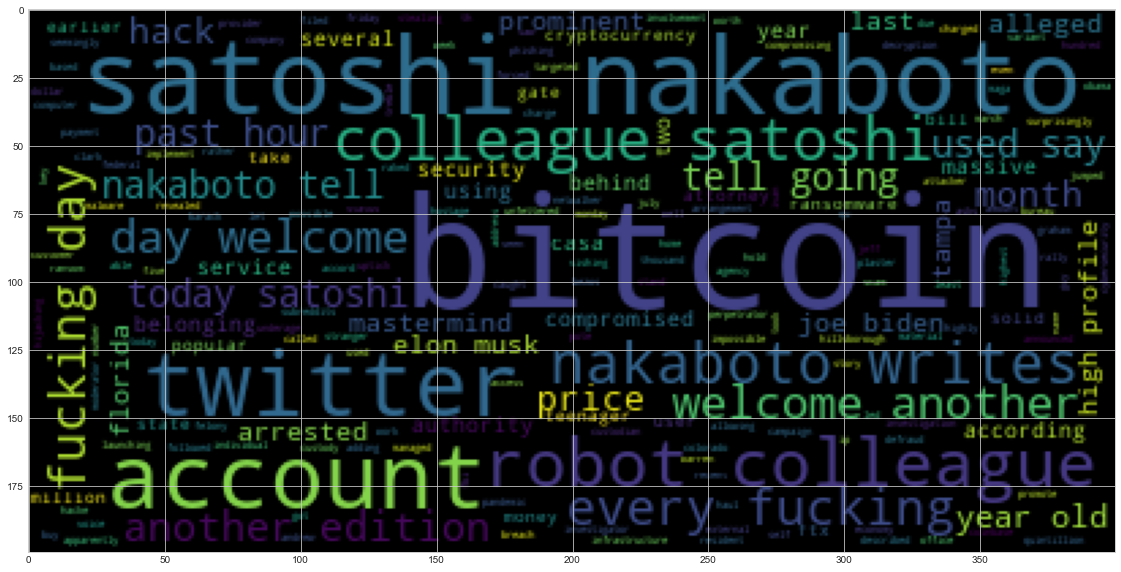

In [352]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_texts = ' '.join([' '.join(tokens) for tokens in bitcoin_sentiment_df['tokens']])

bitcoin_wc = WordCloud().generate(bitcoin_texts)
plt.imshow(bitcoin_wc)

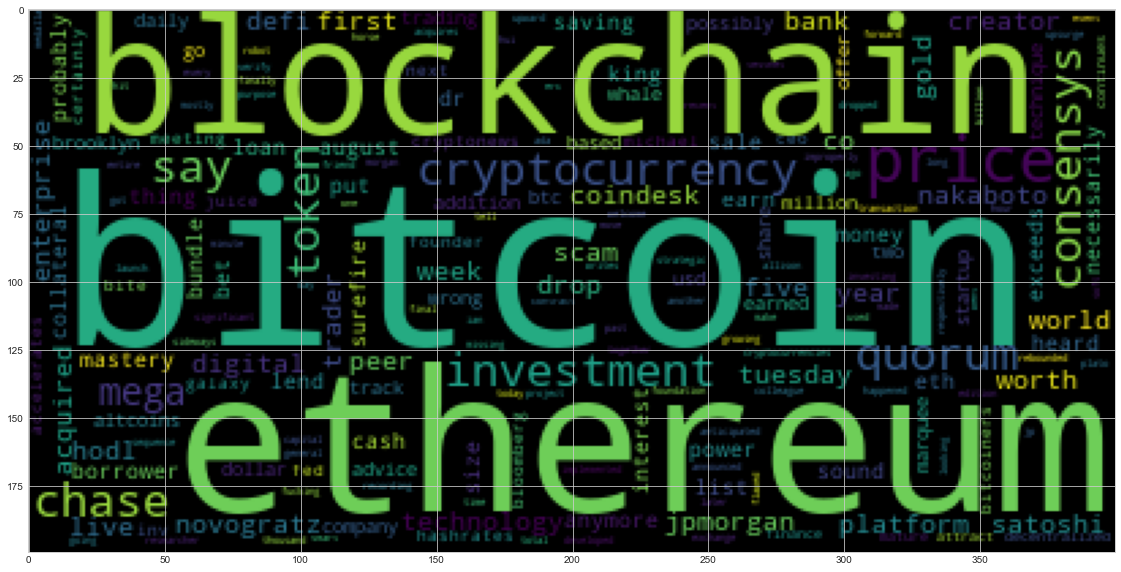

In [353]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_texts = ' '.join([' '.join(tokens) for tokens in ethereum_sentiment_df['tokens']])

ethereum_wc = WordCloud().generate(ethereum_texts)
plt.imshow(ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [354]:
import spacy
from spacy import displacy

In [356]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [357]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [361]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_texts = ' '.join([tokens for tokens in bitcoin_sentiment_df['text']])
bitcoin_texts

"Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name has not been revealed due to his underage status. According t… Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke… Bitcoin payments and IP addresses led investigators to two of the alleged perpetrators in just over two weeks. Graham Ivan Clark, the 17-year-old “mastermind” behind the massive Twitter breach that compromised high-profile accounts, like those belonging to Joe Biden and Elon Musk, got caught stealing hundreds of thousands of dollars worth of Bitcoins last year.\xa0Accord… The story of a guy who wouldn't let a few quintillion possible decryption keys stand between him and h

In [381]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_texts)

# Add a title to the document
# YOUR CODE HERE!
# doc.title = 'Bitcoin NER'

In [382]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [385]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(f'{ent.text} {ent.label_}')

Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
Casa PERSON
Colorado GPE
Coinbase PRODUCT
Casa ORG
Bitcoin GPE
IP ORG
two CARDINAL
just over two weeks DATE
Graham Ivan Clark PERSON
17-year-old DATE
Twitter ORG
Joe Biden PERSON
Elon Musk PERSON
hundreds of thousands of dollars MONEY
Bitcoins GPE
last year DATE
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five months DATE
Earlier this month DATE
Twitter ORG
Elon Musk WORK_OF_ART
Joe Biden PERSON
Barack Obama PERSON
Bill Gates PERSON
Jeff Bezos PERSON
Andrew Warren PERSON
today DATE
30 CARDINAL
17-year-old DATE
Tampa GPE
Florida GPE
Twitter ORG
the Federal Bureau of Investigation ORG
FBI ORG
the Cybersecurity and Infrastructure Security Agency ORG
Tampa GPE
Friday DATE
Twitter ORG
earlier this month DATE
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
at least 70 CARDINAL
Twitter ORG
US GPE
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To

---

## Ethereum NER

In [377]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_texts = ' '.join([tokens for tokens in ethereum_sentiment_df['text']])
ethereum_texts

'TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\n\nCash isn\'t necessarily king anymore. You\'ve probably heard that cryptocurrency and blockchain technologies (which power things like Bitcoin and Eth… It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly go wrong? Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase & Co\'s marquee blockchain platform Quorum, the companies said on Tuesday. <ol><li>Million-Dollar Bitcoin Whale Says Traders Should Track Two Altcoins in Addition to BTC\xa0\xa0The Daily Hodl\r\n</li><li>Trader Who Earned USD 11m Shares Trading Techniques, Offers Advice\xa0\xa0Cryptonews\r\n</li><li>Blockchain Bites: Hashrates Drop, Bitcoiners Hodl… <ul>\n<li>Michael Novogratz told Bloomberg the price of gold could certainly get up to $3,000.\xa0</li>\n<li>The Galaxy D

In [378]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ethereum_texts)

# Add a title to the document
# YOUR CODE HERE!
# doc.title = 'Ethereum NER'

In [379]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [384]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(f'{ent.text} {ent.label_}')

Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
Casa PERSON
Colorado GPE
Coinbase PRODUCT
Casa ORG
Bitcoin GPE
IP ORG
two CARDINAL
just over two weeks DATE
Graham Ivan Clark PERSON
17-year-old DATE
Twitter ORG
Joe Biden PERSON
Elon Musk PERSON
hundreds of thousands of dollars MONEY
Bitcoins GPE
last year DATE
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five months DATE
Earlier this month DATE
Twitter ORG
Elon Musk WORK_OF_ART
Joe Biden PERSON
Barack Obama PERSON
Bill Gates PERSON
Jeff Bezos PERSON
Andrew Warren PERSON
today DATE
30 CARDINAL
17-year-old DATE
Tampa GPE
Florida GPE
Twitter ORG
the Federal Bureau of Investigation ORG
FBI ORG
the Cybersecurity and Infrastructure Security Agency ORG
Tampa GPE
Friday DATE
Twitter ORG
earlier this month DATE
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
at least 70 CARDINAL
Twitter ORG
US GPE
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To